## Processing Sensor Data from Catalina Jemez CZO BGZOB Pit 1
Marc Berghouse 9/19/2020

This array includes:
- apogee_SO110
- Vaisala_GMM220
- DecagonMPS6
- Decagon5TE
- Vertical redox prodes from Paleo Terra

Issues:
- 2 sensors at 60cm. Not sure if the mask applied to O2 data should be lower.
- I am using Apogee temp to be consistent with Shale Hills data, but we also have Decagon temp for this site. Is there any reason to use Decagon over Apogee, or should we use Apogee when possible to be consistent?
- I'm not sure which water potential values are unrealistic


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
infile1 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_co2o2_2014.csv"
infile2 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_co2o2_2015.csv" 
infile3 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_co2o2_2016.csv" 
infile4 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_co2o2_2017.csv" 
infile5 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_soilMTP_2014.csv" 
infile6 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_soilMTP_2015.csv" 
infile7 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_soilMTP_2016.csv" 
infile8 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BGZOB1_soilMTP_2017.csv" 
infile9 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BigelowRedox_2015.csv" 
infile10 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BigelowRedox_2016.csv" 
infile11 = "../../raw_data/Catalina-Jemez/BGZOB_Pit1/BigelowRedox_2017.csv" 
infile12 = "../../raw_data/Catalina-Jemez/Catalina-Jemez_BGZOB_PRISM.csv"
df1 = pd.read_csv(infile1, na_values='NAN',  parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN',  parse_dates=[0], index_col=0) 
df3 = pd.read_csv(infile3, na_values='NAN',  parse_dates=[0], index_col=0) 
df4 = pd.read_csv(infile4, na_values='NAN',  parse_dates=[0], index_col=0) 
df5 = pd.read_csv(infile5, na_values='NAN',  parse_dates=[0], index_col=0) 
df6 = pd.read_csv(infile6, na_values='NAN',  parse_dates=[0], index_col=0) 
df7 = pd.read_csv(infile7, na_values='NAN',  parse_dates=[0], index_col=0) 
df8 = pd.read_csv(infile8, na_values='NAN',  parse_dates=[0], index_col=0) 
df9 = pd.read_csv(infile9, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit1_ORP_5','Pit1_ORP_10','Pit1_ORP_30','Pit1_ORP_60']) 
df10 = pd.read_csv(infile10, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit1_ORP_5','Pit1_ORP_10','Pit1_ORP_30','Pit1_ORP_60']) 
df11 = pd.read_csv(infile11, na_values='NAN',  parse_dates=[0], index_col=0, usecols = ['DateTime','Pit1_ORP_5','Pit1_ORP_10','Pit1_ORP_30','Pit1_ORP_60']) 
df12 = pd.read_csv(infile12, na_values=['NAN',-9999,-99999], skiprows=10, parse_dates=[0], index_col=0) 



C:\Users\marcb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\marcb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df1=df1.drop(['MST'])
df2=df2.drop(['MST'])
df3=df3.drop(['MST'])
df4=df4.drop(['MST'])
df5=df5.drop(['MST'])
df6=df6.drop(['MST'])
df7=df7.drop(['MST'])
df8=df8.drop(['MST'])
df9=df9.drop(['MST'])
df10=df10.drop(['MST'])
df11=df11.drop(['MST'])

df4

,TempSO1(10cm),TempSO2(30cm),TempSO3(60cm),TempSO4(60cm),O2soil1(10cm),O2soil2(30cm),O2soil3(60cm),O2soil4(60cm),CO2soil1(10cm),CO2soil2(30cm),CO2soil3(60cm),CO2soil4(60cm)
TIMESTAMP,,,,,,,,,,,,
1/1/2017 0:00,2.761,4.073,4.711,4.645,19.372,20.034,16.693,17.878,5893.804,9939.949,5819.989,880.672
1/1/2017 0:15,2.757,4.061,4.711,4.645,19.377,20.059,16.679,17.875,6028.584,9891.343,5813.069,874.287
1/1/2017 0:30,2.742,4.052,4.701,4.645,19.388,20.094,16.655,17.865,6349.861,9837.668,5854.406,848.023
1/1/2017 0:45,2.74,4.051,4.691,4.638,19.374,20.119,16.637,17.837,6277.213,9798.428,5796.696,855.552
1/1/2017 1:00,2.74,4.042,4.688,4.635,19.373,20.139,16.617,17.834,6176.747,9769.653,5803.65,863.896
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2017 22:45,5.822,6.235,6.823,6.939,19.557,19.63,20.356,19.357,1284.251,2107.789,1761.295,1771.878
12/31/2017 23:00,5.794,6.235,6.825,6.941,19.559,19.63,20.36,19.357,1277.044,2122.021,1759.653,1780.454
12/31/2017 23:15,5.774,6.235,6.825,6.946,19.56,19.63,20.373,19.357,1283.339,2104.413,1757.281,1794.686


In [3]:
#df9=df9.loc[0:4]
df10


,Pit1_ORP_5,Pit1_ORP_10,Pit1_ORP_30,Pit1_ORP_60
DateTime,,,,
1/1/2016 0:00,458.2,324.6,585.3,583.3
1/1/2016 0:15,458.2,325.3,585.3,583.3
1/1/2016 0:30,458.2,323.9,585.3,583.3
1/1/2016 0:45,458.8,326,585,583.3
1/1/2016 1:00,456.5,326,585.3,582.9
...,...,...,...,...
12/31/2016 22:45,481.8,409.4,671.4,562.6
12/31/2016 23:00,481.4,401,672.1,562.9
12/31/2016 23:15,481.1,399.6,672.1,562.9


In [4]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], sort=False)
df.columns=['ApogeeTemp_10cm.deg.C', 'ApogeeTemp_30cm.deg.C', 'ApogeeTemp_60cm.deg.C', 'ApogeeTemp_60(2)cm.deg.C', 'O2_10cm.percent.0-100','O2_30cm.percent.0-100', 'O2_60cm.percent.0-100', 'O2_60(2)cm.percent.0-100', 'CO2_10cm.ppm', 'CO2_30cm.ppm', 'CO2_60cm.ppm', 'CO2_60(2)cm.ppm', 'WaterPotential_10cm.kPa','WaterPotential_30cm.kPa', 'DecagonMPS6Temp_10cm.deg.C','DecagonMPS6Temp_30cm.deg.C', 'SoilMoisture_10cm.m3m3', 'SoilMoisture_30cm.m3m3', 'SoilMoisture_60cm.m3m3', 'SoilMoisture_60(2)cm.m3m3', 'BulkEC_10cm.dS/m', 'BulkEC_30cm.dS/m', 'BulkEC_60cm.dS/m', 'BulkEC_60(2)cm.dS/m', 'Decagon5TETemp_10cm.deg.C','Decagon5TETemp_30cm.deg.C', 'Decagon5TETemp_60cm.deg.C', 'Decagon5TETemp_60(2)cm.deg.C','ReductionPotential_5cm.mV', 'ReductionPotential_10cm.mV', 'ReductionPotential_30cm.mV', 'ReductionPotential_60cm.mV', 'PRISM_precip.mm' ]
df

,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,ApogeeTemp_60(2)cm.deg.C,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,O2_60(2)cm.percent.0-100,CO2_10cm.ppm,CO2_30cm.ppm,...,BulkEC_60(2)cm.dS/m,Decagon5TETemp_10cm.deg.C,Decagon5TETemp_30cm.deg.C,Decagon5TETemp_60cm.deg.C,Decagon5TETemp_60(2)cm.deg.C,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV,PRISM_precip.mm
11/21/2014 12:15,4.476,4.874,6.129,5.403,20.524,20.311,19.791,18.797,1704.656,3584.651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 12:30,4.762,5.218,6.527,5.763,21.239,20.986,20.457,19.432,1914.78,3831.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 12:45,4.836,5.306,6.629,5.841,21.216,20.949,20.453,19.43,1993.477,4009.944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 13:00,4.877,5.34,6.662,5.86,21.212,20.93,20.439,19.435,2031.52,4108.108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 13:15,4.923,5.354,6.678,5.868,21.209,20.916,20.441,19.446,2030.235,4195.483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
#Corrections to whole DataFrame

df=df.astype(float)
df['WaterPotential_10cm.kPa']=abs(df['WaterPotential_10cm.kPa'])
df['WaterPotential_30cm.kPa']=abs(df['WaterPotential_30cm.kPa'])
df.mask(df<=-0.01, inplace=True)


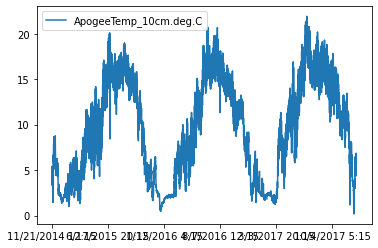

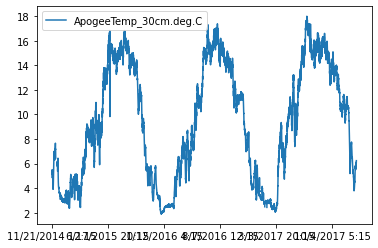

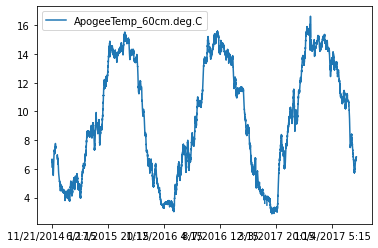

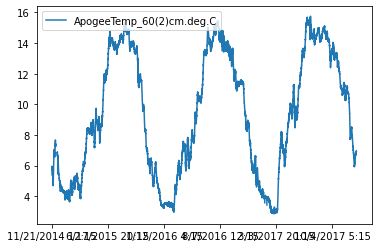

In [6]:
plt.show()
df.plot(use_index=True, y='ApogeeTemp_10cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_30cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_60cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_60(2)cm.deg.C')

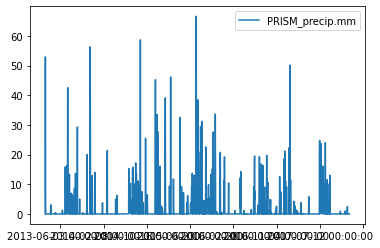

In [7]:
plt.show()
df.plot(use_index=True, y='PRISM_precip.mm')


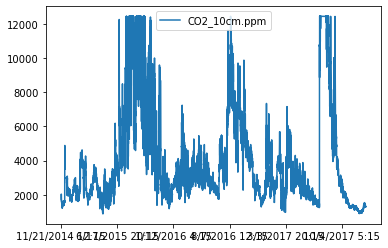

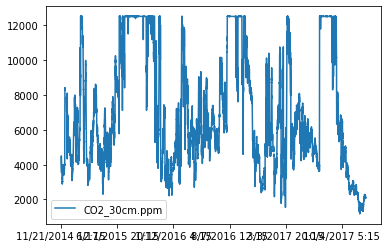

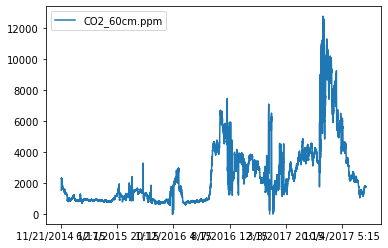

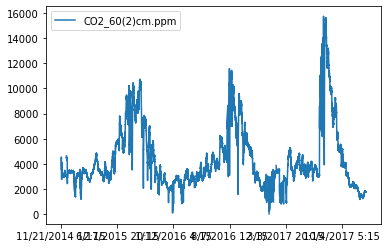

In [8]:
#Plot CO2 data


plt.show()
df.plot(use_index=True, y='CO2_10cm.ppm')
df.plot(use_index=True, y='CO2_30cm.ppm')
df.plot(use_index=True, y='CO2_60cm.ppm')
df.plot(use_index=True, y='CO2_60(2)cm.ppm')





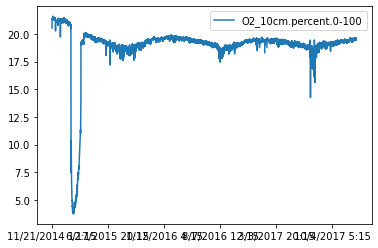

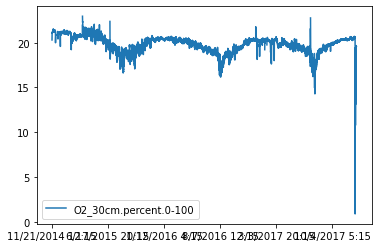

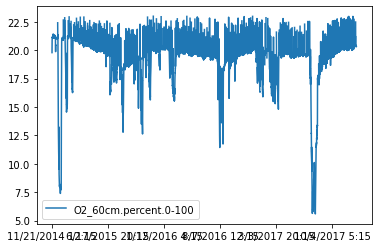

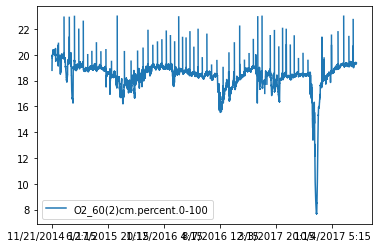

In [9]:
df['O2_10cm.percent.0-100'].mask(df['O2_10cm.percent.0-100']>=23, inplace=True)
df['O2_30cm.percent.0-100'].mask(df['O2_30cm.percent.0-100']>=23, inplace=True)
df['O2_60cm.percent.0-100'].mask(df['O2_60cm.percent.0-100']>=23, inplace=True)
df['O2_60(2)cm.percent.0-100'].mask(df['O2_60(2)cm.percent.0-100']>=23, inplace=True)

plt.show()
df.plot(use_index=True, y='O2_10cm.percent.0-100')
df.plot(use_index=True, y='O2_30cm.percent.0-100')
df.plot(use_index=True, y='O2_60cm.percent.0-100')
df.plot(use_index=True, y='O2_60(2)cm.percent.0-100')

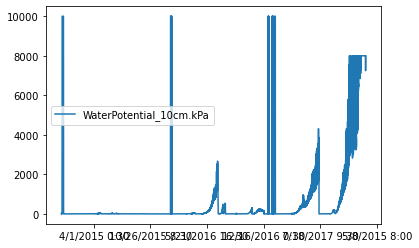

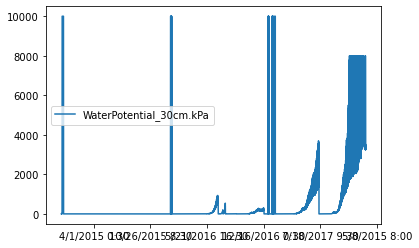

In [10]:
plt.show()
df.plot(use_index=True, y='WaterPotential_10cm.kPa')
df.plot(use_index=True, y='WaterPotential_30cm.kPa')

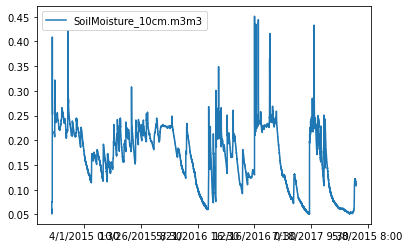

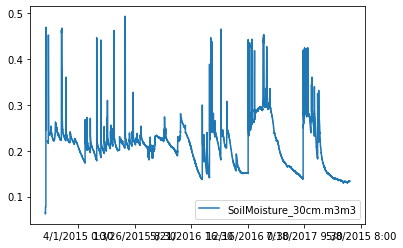

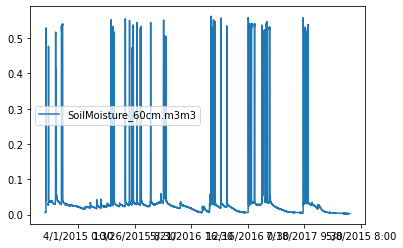

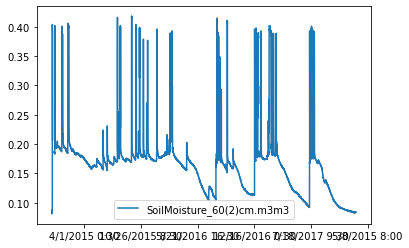

In [11]:
plt.show()
df.plot(use_index=True, y='SoilMoisture_10cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_30cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_60cm.m3m3')
df.plot(use_index=True, y='SoilMoisture_60(2)cm.m3m3')

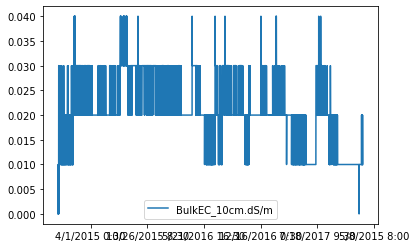

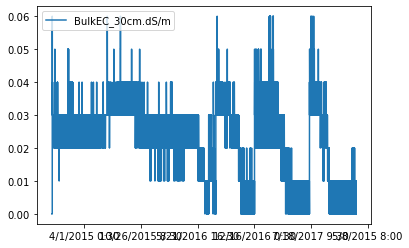

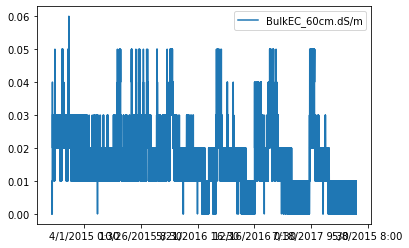

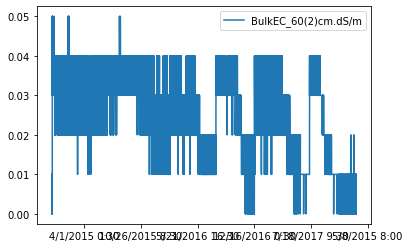

In [12]:
plt.show()
df.plot(use_index=True, y='BulkEC_10cm.dS/m')
df.plot(use_index=True, y='BulkEC_30cm.dS/m')
df.plot(use_index=True, y='BulkEC_60cm.dS/m')
df.plot(use_index=True, y='BulkEC_60(2)cm.dS/m')

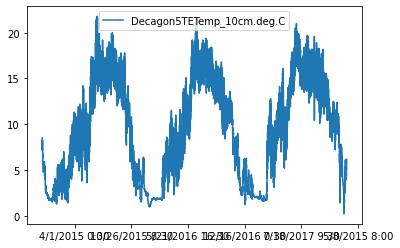

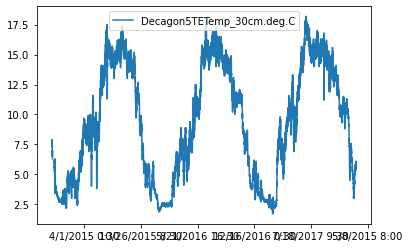

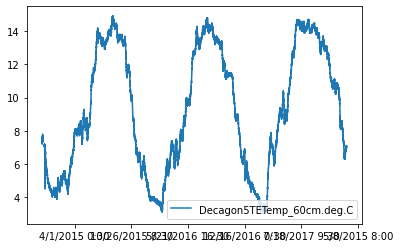

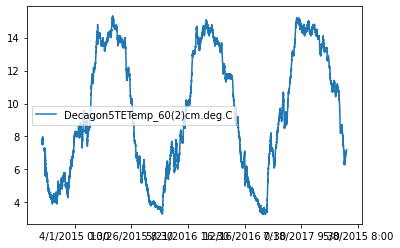

In [13]:
plt.show()
df.plot(use_index=True, y='Decagon5TETemp_10cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_30cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_60cm.deg.C')
df.plot(use_index=True, y='Decagon5TETemp_60(2)cm.deg.C')


In [14]:
df=df.drop(columns='Decagon5TETemp_10cm.deg.C')
df=df.drop(columns='Decagon5TETemp_30cm.deg.C')
df=df.drop(columns='Decagon5TETemp_60cm.deg.C')
df=df.drop(columns='Decagon5TETemp_60(2)cm.deg.C')



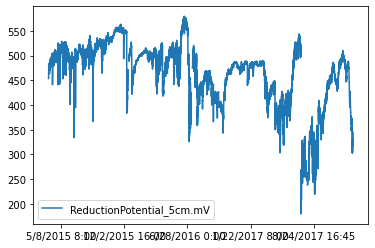

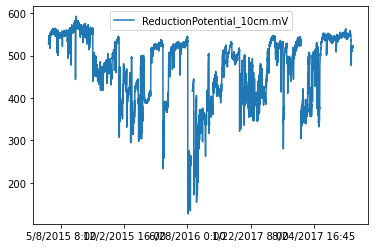

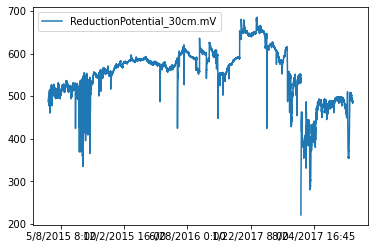

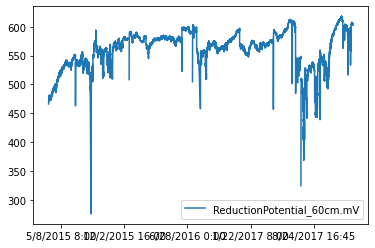

In [15]:
plt.show()
df.plot(use_index=True, y='ReductionPotential_5cm.mV')
df.plot(use_index=True, y='ReductionPotential_10cm.mV')
df.plot(use_index=True, y='ReductionPotential_30cm.mV')
df.plot(use_index=True, y='ReductionPotential_60cm.mV')

In [16]:
output=df.copy()
today = dt.date.today()
outfile = '../../processed_data/Catalina-Jemez/BGZOB_Pit1_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [17]:
output

,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,ApogeeTemp_60(2)cm.deg.C,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,O2_60(2)cm.percent.0-100,CO2_10cm.ppm,CO2_30cm.ppm,...,SoilMoisture_60(2)cm.m3m3,BulkEC_10cm.dS/m,BulkEC_30cm.dS/m,BulkEC_60cm.dS/m,BulkEC_60(2)cm.dS/m,ReductionPotential_5cm.mV,ReductionPotential_10cm.mV,ReductionPotential_30cm.mV,ReductionPotential_60cm.mV,PRISM_precip.mm
11/21/2014 12:15,4.476,4.874,6.129,5.403,20.524,20.311,19.791,18.797,1704.656,3584.651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 12:30,4.762,5.218,6.527,5.763,21.239,20.986,20.457,19.432,1914.780,3831.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 12:45,4.836,5.306,6.629,5.841,21.216,20.949,20.453,19.430,1993.477,4009.944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 13:00,4.877,5.340,6.662,5.860,21.212,20.930,20.439,19.435,2031.520,4108.108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/21/2014 13:15,4.923,5.354,6.678,5.868,21.209,20.916,20.441,19.446,2030.235,4195.483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
